# Imports

In [1]:
# Import libraries and modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Load data

# 1. Data Exploration:

* Start by exploring the dataset to understand its structure and identify key variables.
* Check for missing data and outliers.

In [2]:
# read the data into dataframe
df_youtube = pd.read_csv(r"C:\Users\Thabani\OneDrive - Terra Group\Desktop\PowerBI Data\youtubers_df.csv", index_col = 0)


In [3]:
# display first 5 rows of the data to understand how the dataset is structured.
df_youtube.head()

,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
Rank,,,,,,,,
1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [4]:
# display last 5 rows of the data to understand how the dataset is structured.
df_youtube.tail()

,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
Rank,,,,,,,,
996,hamzymukbang,NaN,11700000.0,Estados Unidos,397400.0,14000.0,124.0,http://youtube.com/channel/UCPKNKldggioffXPkSm...
997,Adaahqueen,NaN,11700000.0,India,1100000.0,92500.0,164.0,http://youtube.com/channel/UCk3fFpqI5kDMf__mUP...
998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...
999,PenMultiplex,NaN,11700000.0,India,14000.0,81.0,1.0,http://youtube.com/channel/UCObyBrdrtQ20BU9PxH...
1000,OneindiaHindi,Noticias y Política,11700000.0,India,2200.0,31.0,1.0,http://youtube.com/channel/UCOjgc1p2hJ4GZi6pQQ...


### The structure of Dataset

In [5]:
# Get the size of the dataset
df_youtube.size

8000

In [6]:
# Get the shape of the dataset
df_youtube.shape

(1000, 8)

In [7]:
# let display the basic information about our dataset
df_youtube.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Username    1000 non-null   object 
 1   Categories  694 non-null    object 
 2   Suscribers  1000 non-null   float64
 3   Country     1000 non-null   object 
 4   Visits      1000 non-null   float64
 5   Likes       1000 non-null   float64
 6   Comments    1000 non-null   float64
 7   Links       1000 non-null   object 
dtypes: float64(4), object(4)
memory usage: 70.3+ KB


In [8]:
# Get descriptive statistics such as mean, standard deviation, and range of the numerical columns in the dataset.
df_youtube.describe()

,Suscribers,Visits,Likes,Comments
count,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,2.189440e+07,1.209446e+06,5.363259e+04,1288.768000
std,1.682775e+07,5.229942e+06,2.580457e+05,6778.188308
min,1.170000e+07,0.000000e+00,0.000000e+00,0.000000
25%,1.380000e+07,3.197500e+04,4.717500e+02,2.000000
50%,1.675000e+07,1.744500e+05,3.500000e+03,67.000000
75%,2.370000e+07,8.654750e+05,2.865000e+04,472.000000
max,2.495000e+08,1.174000e+08,5.300000e+06,154000.000000


**Dataset Information**: The Dataset has 1000 rows and 8 columns.The column "Categories" countains 694 non-null values, this means there are about 306 values missing. 

### Find missing values

In [9]:
#find the number of missing values in each column
df_youtube.isnull().sum()

Username        0
Categories    306
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64

### Review rows with missing values

* There is only one column with missing values, which is Categories the rest of the columns has no missing values.

* Before dealing with missing values, it's important to understand the nature of the missing value/s. Display all rows with missing values from df. To do this, perform the following three steps

In [10]:
# 1. Apply the `isna()` method to the `df_youtube` dataframe and assign back to `mask` and display the first 5 rows
mask = df_youtube.isna()
mask.head()

,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
Rank,,,,,,,,
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False


* Apply the any() method to the Boolean dataframe you created to make a Boolean series where each element in the series represents True if a row of the dataframe contains any True values and False if any row in the dataframe contains any False values. 

In [11]:
# 2. Apply the `any()` method to `mask` and assign the results back to `mask`
mask = mask.any(axis = 1)
mask.head()

Rank
1    False
2    False
3    False
4     True
5    False
dtype: bool

* Because mask is now a series of Boolean values, we can use it as a Boolean mask. Apply the Boolean mask to the df dataframe to return a filtered dataframe containing just the rows that contain a missing value. Assign the results to a variable called missing_rows.

In [12]:
# 3. Apply `mask` as a Boolean mask to `df_youtube` and assign results to `df_missing_rows`
missing_rows = df_youtube[mask]
missing_rows

,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
Rank,,,,,,,,
4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
12,GoldminesTelefilms,NaN,89700000.0,India,34600.0,421.0,13.0,http://youtube.com/channel/UCyoXW-Dse7fURq30EW...
17,zeetv,NaN,72500000.0,India,7300.0,144.0,1.0,http://youtube.com/channel/UCppHT7SZKKvar4Oc9J...
21,colorstv,NaN,66600000.0,India,14700.0,413.0,3.0,http://youtube.com/channel/UC55IWqFLDH1Xp7iu1_...
39,shemaroo,NaN,48800000.0,India,22600.0,163.0,7.0,http://youtube.com/channel/UCF1JIbMUs6uqoZEY1H...
...,...,...,...,...,...,...,...,...
994,RedChilliesEntertainment,NaN,11700000.0,India,848300.0,66700.0,842.0,http://youtube.com/channel/UCjJKg01HAP01xCLVhD...
995,VYRLOriginals,NaN,11700000.0,India,48800.0,949.0,101.0,http://youtube.com/channel/UCye6Oz0mg46S362LwA...
996,hamzymukbang,NaN,11700000.0,Estados Unidos,397400.0,14000.0,124.0,http://youtube.com/channel/UCPKNKldggioffXPkSm...


* I have investigated and find indeed there are 306 data entries missing in this dataset, dealing with missing data especially when is such a significant number can be tricky, usually you will have to address this with the relevant stakeholders before any further analysis. But in for now i'm going to fill the missing values with uknown values.


### Fill in missing values

In [13]:
# fill in  null or missing values

df_youtube['Categories'] = df_youtube['Categories'].fillna(df_youtube['Categories'].mode()[0])
df_youtube['Country'] = df_youtube['Country'].fillna(df_youtube['Country'].mode()[0])

#for Numerical Value
df_youtube['Suscribers'] = df_youtube['Suscribers'].fillna(np.mean(pd.to_numeric(df_youtube['Suscribers'])))
df_youtube['Visits'] = df_youtube['Visits'].fillna(np.mean(pd.to_numeric(df_youtube['Visits'])))
df_youtube['Likes'] = df_youtube['Likes'].fillna(np.mean(pd.to_numeric(df_youtube['Likes'])))
df_youtube['Comments'] = df_youtube['Comments'].fillna(np.mean(pd.to_numeric(df_youtube['Comments'])))



In [14]:
#check for if we stil have missing values
df_youtube.isna().sum()

Username      0
Categories    0
Suscribers    0
Country       0
Visits        0
Likes         0
Comments      0
Links         0
dtype: int64

* We have filled in  all the missing values from our dataset using fillna method.

In [15]:
df_youtube.shape

(1000, 8)

* In our analysis we're not going to use links column, it's not neccessary therefore we can drop this column

In [16]:
# drop links columns from our dataset
df = df_youtube.drop('Links', axis  =1)
df.head()

,Username,Categories,Suscribers,Country,Visits,Likes,Comments
Rank,,,,,,,
1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0
2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0
3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0
4,SETIndia,Música y baile,162600000.0,India,15600.0,166.0,9.0
5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0


In [17]:
# convert the Suscribers,Visits,Likes,Comments data types to int
df['Suscribers'] = df['Suscribers'].astype(int)
df['Visits'] = df['Visits'].astype(int)
df['Likes'] = df['Likes'].astype(int)
df['Comments'] = df['Comments'].astype(int)

In [18]:
# rename the Suscribe to the correct spelling
df.rename(columns = {'Suscribers': 'Subscribers'}, inplace=True)

In [19]:
# check if the data types has been converted
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Username     1000 non-null   object
 1   Categories   1000 non-null   object
 2   Subscribers  1000 non-null   int32 
 3   Country      1000 non-null   object
 4   Visits       1000 non-null   int32 
 5   Likes        1000 non-null   int32 
 6   Comments     1000 non-null   int32 
dtypes: int32(4), object(3)
memory usage: 46.9+ KB


In [20]:
df.describe()

,Subscribers,Visits,Likes,Comments
count,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,2.189440e+07,1.209446e+06,5.363259e+04,1288.768000
std,1.682775e+07,5.229942e+06,2.580457e+05,6778.188308
min,1.170000e+07,0.000000e+00,0.000000e+00,0.000000
25%,1.380000e+07,3.197500e+04,4.717500e+02,2.000000
50%,1.675000e+07,1.744500e+05,3.500000e+03,67.000000
75%,2.370000e+07,8.654750e+05,2.865000e+04,472.000000
max,2.495000e+08,1.174000e+08,5.300000e+06,154000.000000


In [21]:
# find the correlation  to understand the relationship between the variables, how the each variable interact with each other
plt.figure(figsize = (13, 7))
correlation = df.corr(numeric_only = True)
#sns.heatmap(correlation, annot = True, cmap = 'Blues')
print(correlation)


             Subscribers    Visits     Likes  Comments
Subscribers     1.000000  0.245203  0.211639  0.036350
Visits          0.245203  1.000000  0.950470  0.324067
Likes           0.211639  0.950470  1.000000  0.325911
Comments        0.036350  0.324067  0.325911  1.000000


<Figure size 1300x700 with 0 Axes>

* From our correlation findings, its easy to note the strong positive correlation relationship between visits and likes, this means thats as the number of streams(visits), likewise the Likes encreases as well.

* The relationship between comments and Subcribers is very low or neutral 

## Hangling outliers 

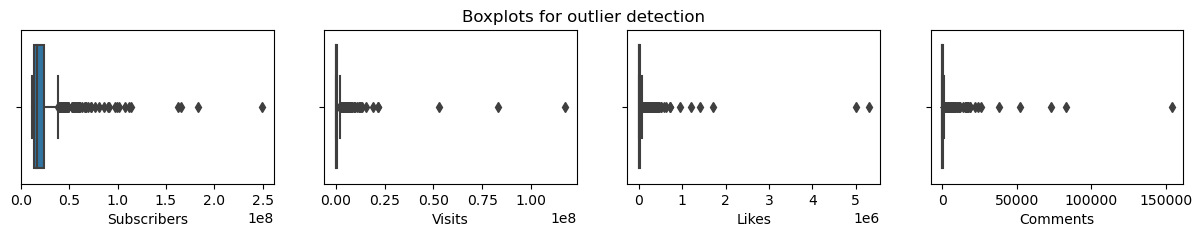

In [22]:
# check for outliers
fig, axes = plt.subplots(1, 4, figsize=(15, 2))
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax=axes[0], x=df['Subscribers'])
sns.boxplot(ax=axes[1], x=df['Visits'])
sns.boxplot(ax=axes[2], x=df['Likes'])
sns.boxplot(ax=axes[3], x=df['Comments'])
sns.boxplot
plt.show();

* All three variables contains outliers. Some are extreme(such as subscribers) but otheres not so much.

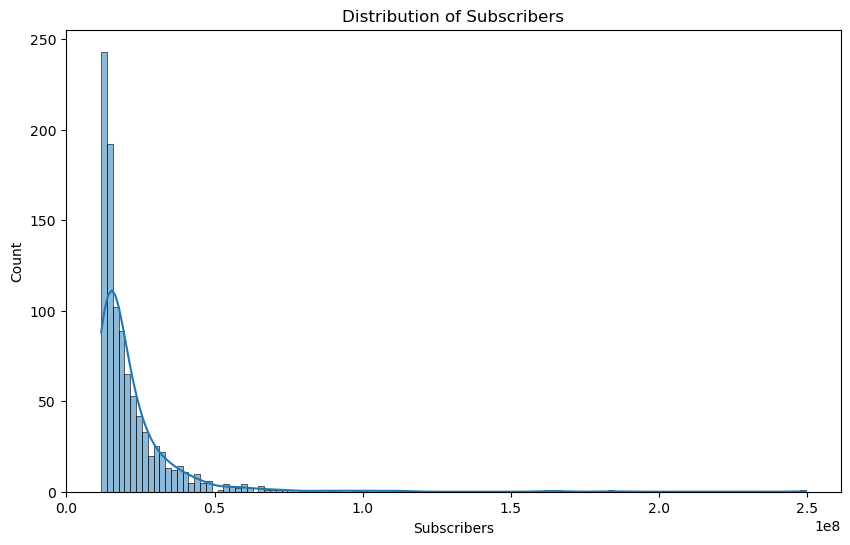

In [23]:
plt.figure(figsize = (10,6))
plt.title('Distribution of Subscribers')
sns.histplot(x =df['Subscribers'], kde =True)
plt.show()

In [24]:
df

,Username,Categories,Subscribers,Country,Visits,Likes,Comments
Rank,,,,,,,
1,tseries,Música y baile,249500000,India,86200,2700,78
2,MrBeast,"Videojuegos, Humor",183500000,Estados Unidos,117400000,5300000,18500
3,CoComelon,Educación,165500000,Unknown,7000000,24700,0
4,SETIndia,Música y baile,162600000,India,15600,166,9
5,KidsDianaShow,"Animación, Juguetes",113500000,Unknown,3900000,12400,0
...,...,...,...,...,...,...,...
996,hamzymukbang,Música y baile,11700000,Estados Unidos,397400,14000,124
997,Adaahqueen,Música y baile,11700000,India,1100000,92500,164
998,LittleAngelIndonesia,Música y baile,11700000,Unknown,211400,745,0


### If we were to remove the outlier, this is how we were going to go about it:

In [25]:
# find the upper limit and the lower limit
upper_limit = df['Subscribers'].mean() + 3*df['Subscribers'].std()
lower_limit = df['Subscribers'].mean() - 3*df['Subscribers'].std()

print(f'Upper Limit: {upper_limit:.3f}')
print(f'Upper Limit: {lower_limit:.3f}')

Upper Limit: 72377658.168
Upper Limit: -28588858.194


In [26]:

df.loc[(df['Subscribers'] > upper_limit ) | (df['Subscribers']< lower_limit)]

,Username,Categories,Subscribers,Country,Visits,Likes,Comments
Rank,,,,,,,
1,tseries,Música y baile,249500000,India,86200,2700,78
2,MrBeast,"Videojuegos, Humor",183500000,Estados Unidos,117400000,5300000,18500
3,CoComelon,Educación,165500000,Unknown,7000000,24700,0
4,SETIndia,Música y baile,162600000,India,15600,166,9
5,KidsDianaShow,"Animación, Juguetes",113500000,Unknown,3900000,12400,0
6,PewDiePie,"Películas, Videojuegos",111500000,Estados Unidos,2400000,197300,4900
7,LikeNastyaofficial,Juguetes,107500000,Unknown,2600000,28000,0
8,VladandNiki,"Animación, Juguetes",101400000,Unknown,4100000,22100,0
9,zeemusiccompany,Música y baile,99700000,India,74300,2600,32


In [27]:
New_Data = df.loc[(df['Subscribers'] <upper_limit) & (df['Subscribers']>=lower_limit)]
New_Data

,Username,Categories,Subscribers,Country,Visits,Likes,Comments
Rank,,,,,,,
18,Pinkfong,"Animación, Juguetes",69600000,Unknown,506400,397,0
19,ChuChuTV,Juguetes,67500000,Unknown,652100,17800,0
20,KondZilla,Música y baile,66599999,Brasil,30400,1100,4
21,colorstv,Música y baile,66599999,India,14700,413,3
22,filmigaane,Música y baile,66400000,India,33000,392,18
...,...,...,...,...,...,...,...
996,hamzymukbang,Música y baile,11700000,Estados Unidos,397400,14000,124
997,Adaahqueen,Música y baile,11700000,India,1100000,92500,164
998,LittleAngelIndonesia,Música y baile,11700000,Unknown,211400,745,0


* Now that we have identified outliers in our dataset, we can either cap or drop the outliers, but for now we just gonna leave them like that.
* If we had dropped our outliers, we would be left with 983 Rows and 7 Columns

In [28]:
print('Old Data Set lenghth: ', len(New_Data))

Old Data Set lenghth:  983


In [29]:
print('New Data Set lenghth: ', len(df))

New Data Set lenghth:  1000


In [30]:
df.size

7000

In [31]:
New_Data.size

6881

In [32]:
df['Subscribers'].max()

249500000

In [33]:
df['Suscribers'].min()

KeyError: 'Suscribers'

In [ ]:
plt.figure(figsize = (7,3))
plt.title("The Subscribers Boxplot")
sns.boxplot(x = df['Subscribers'], fliersize = 3)
plt.xlabel("Number of Subscribers")
plt.show()

In [ ]:
sns.pairplot(data = df, kind = 'scatter')

# 2. Trend Analysis:

* Identify trends among the top YouTube streamers. Which categories are the most popular?
* Is there a correlation between the number of subscribers and the number of likes or comments?


In [ ]:
# find the most popular category in youtube streams
Popula_categories = df['Categories'].value_counts()
Popula_categories.head()

In [ ]:
 # find the least popular category in youtube streams
Popula_categories = df['Categories'].value_counts()
Popula_categories.tail()

In [ ]:
# Plot the most popular categories in Youtube 

plt.figure(figsize = (11,4))
sns.barplot(x=df['Categories'].value_counts().index, y=df['Categories'].value_counts().values)
plt.title('Top YouTube Streamer Categories')
plt.xlabel('Categories')
plt.ylabel('Number of Streamers/ Visits')
plt.xticks(rotation=60, ha='right')
plt.show()


In [ ]:
plt.figure(figsize = (13, 7))
correlation = df.corr(numeric_only = True)
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')
plt.title('Correlation between number of subscribers and the number of likes or comments')
plt.tight_layout()

# 3.  Audience Study:

* Analyze the distribution of streamers audiences by country. Are there regional preferences forspecific content categories? 

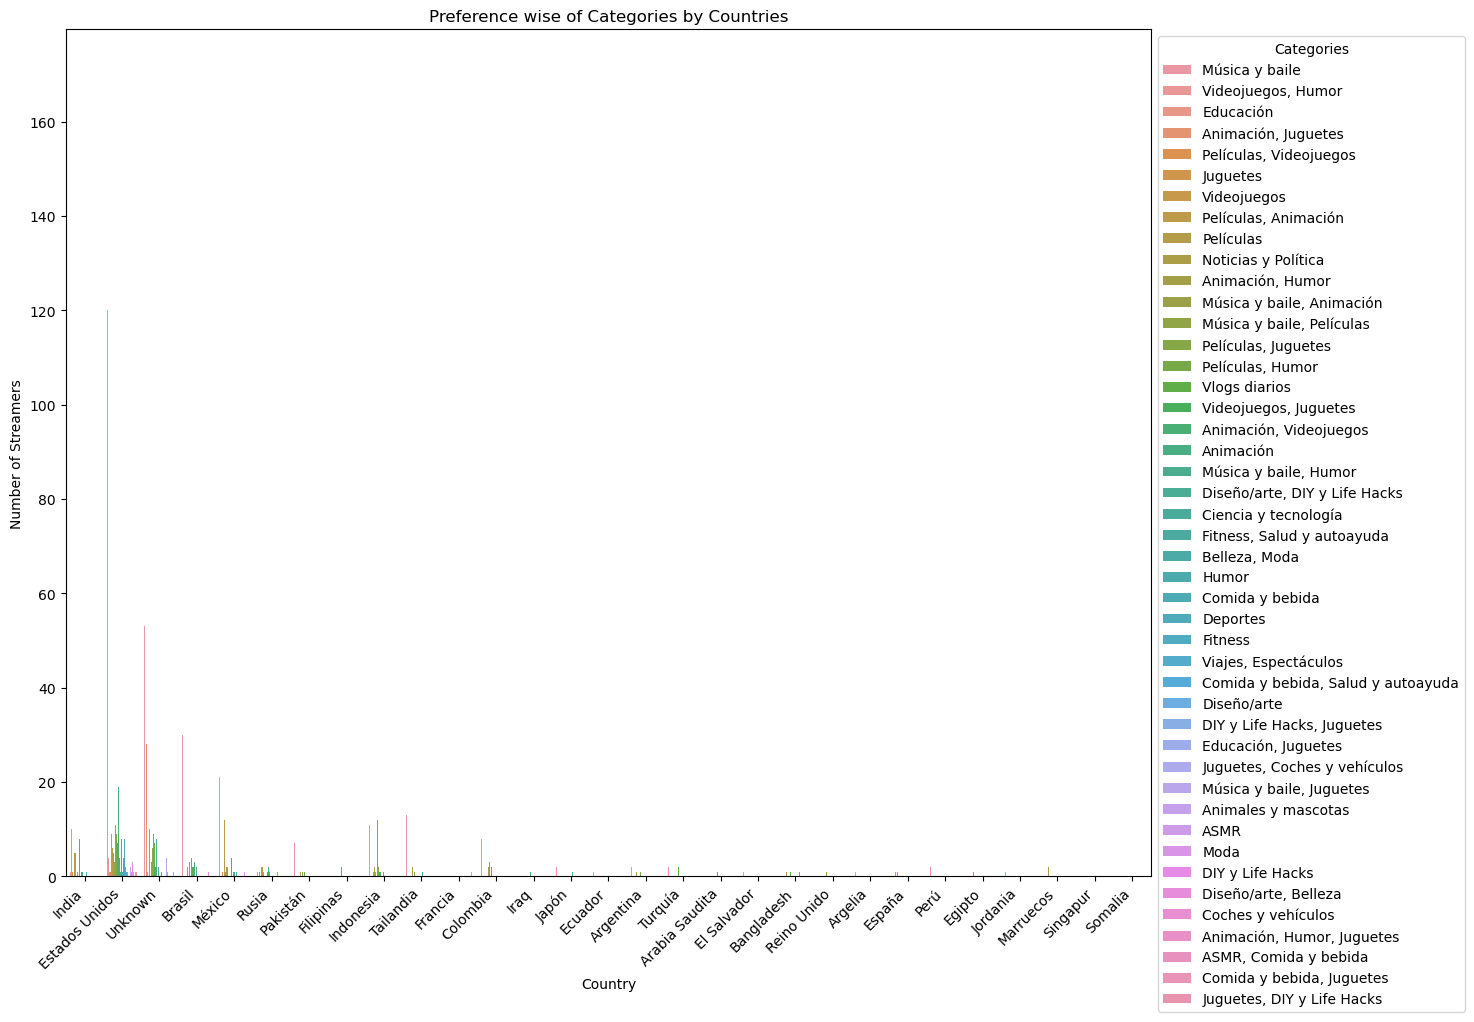

In [34]:
plt.figure(figsize=(14, 11))
sns.countplot(x='Country', hue='Categories', data=df)
plt.title('Preference wise of Categories by Countries')
plt.xlabel('Country')
plt.ylabel('Number of Streamers')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Categories', bbox_to_anchor=(1.00, 1), loc='upper left')
plt.show()

In [35]:
countries_list = df['Country'].value_counts()
countries_list.head()

Country
Estados Unidos    293
India             241
Unknown           171
Brasil             64
México             58
Name: count, dtype: int64

* By the look of things, it shows that musica y balile is doing expectional well in Estados Unidos Region, followed by Uknown in number 2.

# 4. Performance Metrics:

* Calculate and visualize the average number of subscribers, visits, likes, and comments.
* Are there patterns or anomalies in these metrics?

In [36]:
# find the average of Subscribers, Visits, Likes and Comments
avg_suscribers = df['Subscribers'].mean()
avg_visits = df['Visits'].mean()
avg_likes = df['Likes'].mean()
avg_comments = df['Comments'].mean()

print(f'Average Subscribers: {avg_suscribers:0.2f}')
print(f'Average Visits: {avg_visits:0.2f}')
print(f'Average Likes: {avg_likes:0.2f}')
print(f'Average Comments: {avg_comments:0.2f}')

Average Subscribers: 21894399.99
Average Visits: 1209446.31
Average Likes: 53632.59
Average Comments: 1288.77


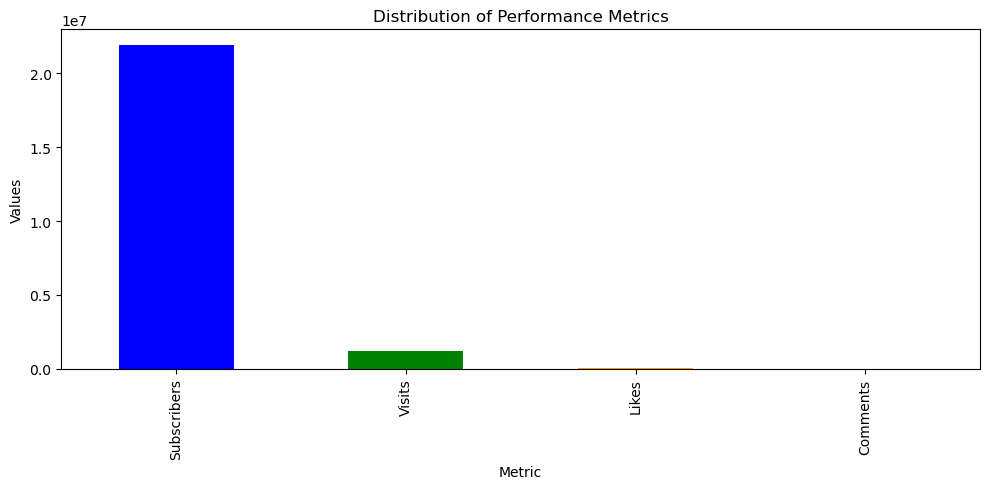

In [37]:
# Visualize metrics
plt.figure(figsize=(10, 5))
metrics_data = df[['Subscribers', 'Visits', 'Likes', 'Comments']].mean()
metrics_data.plot(kind='bar', color=['blue', 'green', 'orange', 'purple'])
#sns.boxplot(data= metrics_data)
plt.title('Distribution of Performance Metrics')
plt.xlabel('Metric')
plt.ylabel('Values')
plt.tight_layout()
plt.show()


# 5. Content Categories:

* Explore the distribution of content categories. Which categories have the highest number of streamers?
* Are there specific categories with exceptional performance metrics?

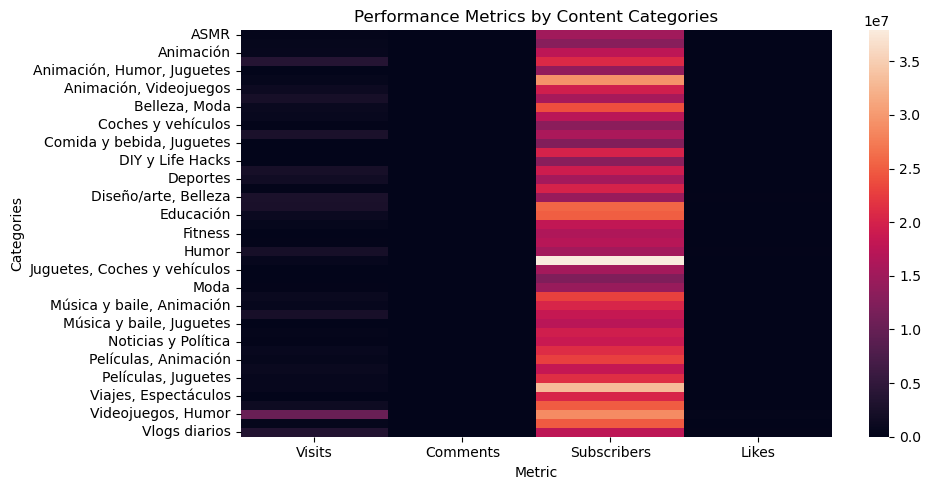

In [38]:
# Visualize the group with the highest number of streams
avg_category = df.groupby('Categories').mean(numeric_only =True)
 
plt.figure(figsize=(10, 5))
sns.heatmap(avg_category[['Visits', 'Comments','Subscribers', 'Likes']])
plt.title('Performance Metrics by Content Categories')
plt.xlabel('Metric')
plt.ylabel('Categories')
plt.tight_layout()
plt.show()

In [39]:
Cat_grouped = (df[["Categories", "Visits"]]
           .groupby("Visits")
           .max()
           .sort_values(by="Visits", ascending = False)
          )
Cat_grouped.head()

,Categories
Visits,
117400000,"Videojuegos, Humor"
83100000,Vlogs diarios
52700000,"Animación, Humor"
21500000,Música y baile
19100000,Música y baile


* Looking at my findings **Videojuegoe and Humor** has the exceptional performance metric followed by **Vlog diario** categories in number two.

# 6. Brands and Collaborations:

* Analyze whether streamers with high performance metrics receive more brand collaborations and
  marketing campaigns

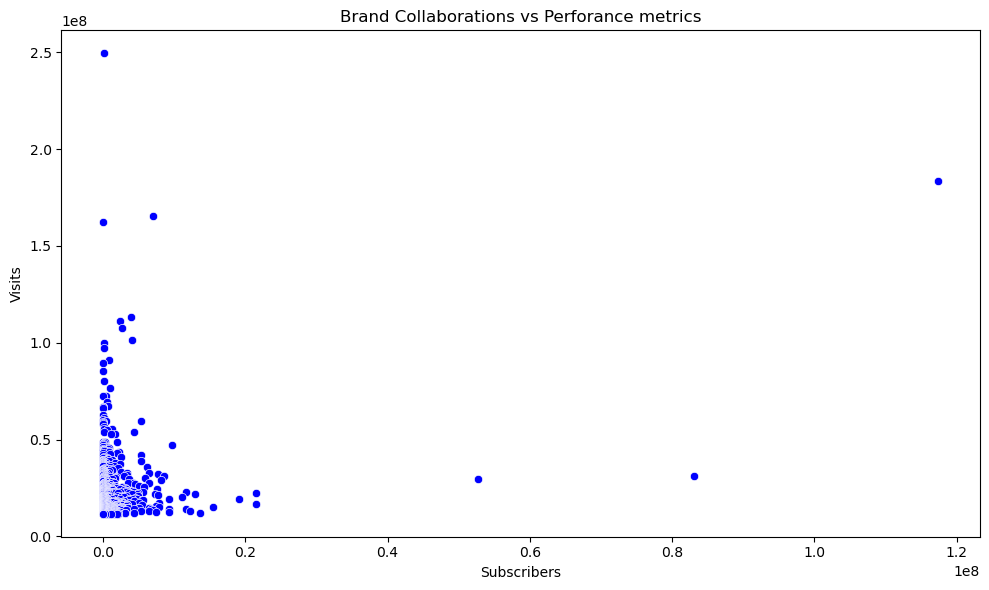

The correlation is between visits and brand collaboration: 0.24520315826666697


In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Visits', y='Subscribers', data = df, color = 'blue')
plt.title('Brand Collaborations vs Perforance metrics')
plt.xlabel('Subscribers')
plt.ylabel('Visits')
plt.tight_layout()
plt.show()

Correlation_visit_sub = df['Visits'].corr(df['Subscribers'])
print('The correlation is between visits and brand collaboration:', Correlation_visit_sub)

* According to the above finding, there is positive 0.24 correlation between visit and brand collaboration.

# 7. Benchmarking:

*  Identify streamers with above-average performance in terms of subscribers, visits, likes, and comments.
*  Who are the top-performing content creators?

In [41]:
# calculate the average values for each metric
avg_suscribers = df['Subscribers'].mean()
avg_visits = df['Visits'].mean()
avg_likes = df['Likes'].mean()
avg_comments = df['Comments'].mean()

# find the top five performing content creators
top_performers = df[
(df['Subscribers'] > avg_suscribers) &
(df['Visits'] > avg_visits) &
(df['Likes'] > avg_likes) &
(df['Comments'] > avg_comments)]
print("**The first 5 Top content creator: ")
print(top_performers.head())

**The first 5 Top content creator: 
         Username              Categories  Subscribers         Country  \
Rank                                                                     
2         MrBeast      Videojuegos, Humor    183500000  Estados Unidos   
6       PewDiePie  Películas, Videojuegos    111500000  Estados Unidos   
27    dudeperfect             Videojuegos     59700000  Estados Unidos   
35    TaylorSwift          Música y baile     54100000  Estados Unidos   
40    JuegaGerman    Películas, Animación     48600000          México   

         Visits    Likes  Comments  
Rank                                
2     117400000  5300000     18500  
6       2400000   197300      4900  
27      5300000   156500      4200  
35      4300000   300400     15000  
40      2000000   117100      3000  


# 8. Content Recommendations:

* Propose a system for enhancing content recommendations to YouTube users based on streamers categories and performance metrics.



### 1. Content-Based Filtering

  * Utilize streaming categories as content features to suggest related content to users according to their preferences.
  * Utilize performance metrics, including subscribers, visits, likes, and comments, as indicators of content popularity and engagement for recommending high-performing content to users.

### 2. Collaborative filtering:

* Utilize user engagement information, including viewing history, preferences, and subscriptions, to discern comparable users and suggest content that aligns with the preferences of similar users, enhancing the likelihood of recommending popular content within that user group.
* Integrate streamer categories and performance metrics into collaborative filtering algorithms to enhance recommendation precision. This approach tailors suggestions based on both user preferences and the performance metrics of the content, ensuring a personalized and informed recommendation system.

### 3. Performance monitoring:

* Introduce performance monitoring to assess the efficacy of recommendations by analyzing user engagement metrics.